In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [24]:
input_size = 4
num_classes = 3
num_epochs = 10000
learning_rate = 0.01

In [30]:
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
print(X_train.shape)  # (100, 4)
print(X_test.shape)   # (50, 4)
print(y_train.shape)  # (100, )
print(y_test.shape)   # (50, )

(100, 4)
(50, 4)
(100,)
(50,)


In [45]:
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)

In [47]:
X_test = scaler.fit_transform(X_test)

In [48]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [49]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
def train(X_train, y_train):
    inputs = Variable(torch.from_numpy(X_train).float())
    targets = Variable(torch.from_numpy(y_train).long())
    
    optimizer.zero_grad()
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    return loss.data[0]

def valid(X_test, y_test):
    inputs = Variable(torch.from_numpy(X_test).float())
    targets = Variable(torch.from_numpy(y_test).long())

    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    # 精度を求める
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == targets.data).sum()
    val_acc = correct / targets.size(0)

    return val_loss.data[0], val_acc

In [51]:
loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)
    
#     if epoch % 1000 == 0:
#         print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
#               % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

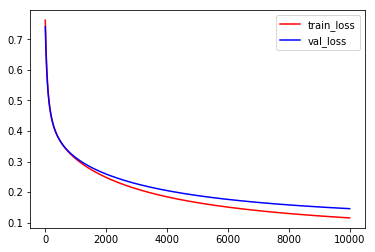

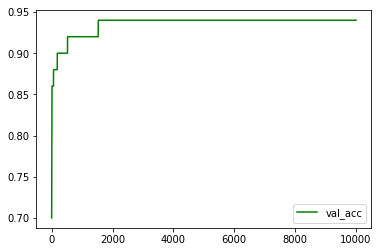

In [52]:
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()